In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cleaned_products.csv')

data.head()


,DairyProduct_PackagingType,Quantity_Value,DairyProduct_IsInfantNutrition,SubBrandRu,Mass_Net,DairyProduct_ManufacturerTaxIdentifier,DairyProduct_IsUnderVeterinaryControl,DairyProduct_IsShelfLifeUpTo40Days,EnergyValueKJ,Manufacturer_Name,...,FunctionNameRu,Protein,StorageConditions_MinStorageTemperature,GTIN,GpcClass4,StorageConditions_MinRelativeHumidity,Grease,Manufacturer_GLN,Quantity_Unit,ProductType
0,ПАКЕТ,1952,False,Детское,1933,123456789,False,True,163.30,Молочные горки,...,Сыр,1.40,3,481291141872136,10000025,9,3.63,4810000000017,GR,Consumer unit [CU]
1,ТЕРМОУСАДОЧНАЯ/УСАДОЧНАЯ УПАКОВКА,1561,False,Ягодное,1525,123456789,True,False,287.83,Калинковичский МК,...,Творог,1.91,2,481613805072946,10000025,18,4.95,4810000000013,GR,Consumer unit [CU]
2,ПАКЕТ,1985,False,Натуральное,1965,123456789,False,False,150.90,Бабушкина крынка,...,Масло,4.40,6,481289108417644,10000025,49,1.26,4810000000003,GR,Consumer unit [CU]
3,ТЕРМОУСАДОЧНАЯ/УСАДОЧНАЯ УПАКОВКА,1315,False,Фитнес,1291,123456789,True,False,344.94,Молочный Мир,...,Сыр,3.60,9,481405364645368,10000025,27,3.04,4810000000004,GR,Consumer unit [CU]
4,БАНКА НЕМЕТАЛЛИЧЕСКАЯ,1491,False,Классическое,1460,123456789,True,False,374.80,Молочный Мир,...,Йогурт,4.82,3,481390231144508,10000025,14,2.80,4810000000004,GR,Consumer unit [CU]


BrandRu
Глубокский           60
ММЗ №1               59
Туровский            59
Молочные горки       58
Рогачевский          58
Пружанский           55
Молодечненский       53
Несвижский           52
Здравушка-милк       52
Молочный гостинец    50
Кобринский           50
Лидский              49
Верхнедвинский       48
Бабушкина крынка     45
Коровкино            44
Молочный Мир         44
Милкавита            43
Слуцкий              43
Беллакт              41
Калинковичский       37
Name: count, dtype: int64


<Axes: xlabel='BrandRu'>

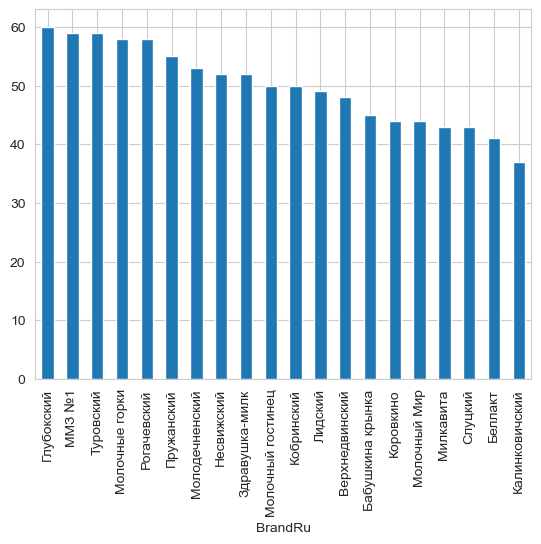

In [4]:
brands = data['BrandRu'].value_counts()
print(brands)
brands.plot(kind='bar')

Типы упаковки:
 DairyProduct_PackagingType
ПАКЕТ                                446
ТЕРМОУСАДОЧНАЯ/УСАДОЧНАЯ УПАКОВКА    268
БУТЫЛКА                              192
БАНКА НЕМЕТАЛЛИЧЕСКАЯ                 94
Name: count, dtype: int64


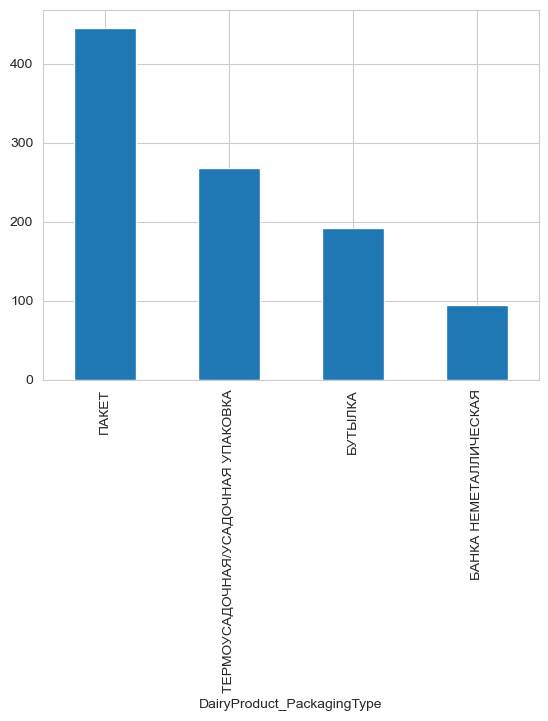

In [5]:
packaging_types = data['DairyProduct_PackagingType'].value_counts()
packaging_types.plot(kind='bar')
print("Типы упаковки:\n", packaging_types)

<Axes: xlabel='DairyProduct_Type'>

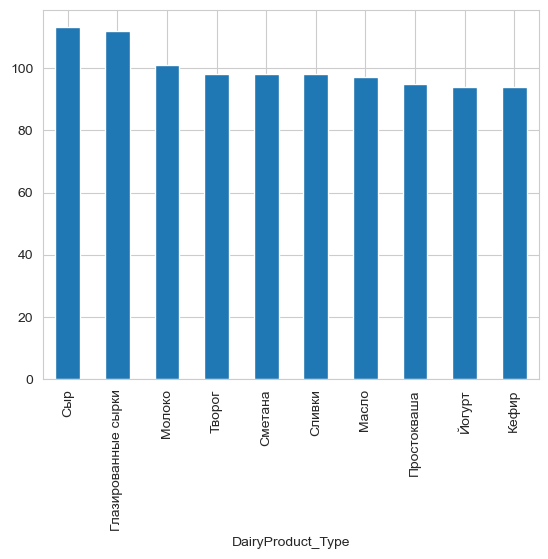

In [7]:
product_types = data['DairyProduct_Type'].value_counts()
product_types.plot(kind='bar')

C:\Users\kochu\AppData\Local\Temp\ipykernel_14352\3289745804.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_nutritional_values[column].values, y=average_nutritional_values.index, ax=axes[i], palette=palette)
C:\Users\kochu\AppData\Local\Temp\ipykernel_14352\3289745804.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_nutritional_values[column].values, y=average_nutritional_values.index, ax=axes[i], palette=palette)
C:\Users\kochu\AppData\Local\Temp\ipykernel_14352\3289745804.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


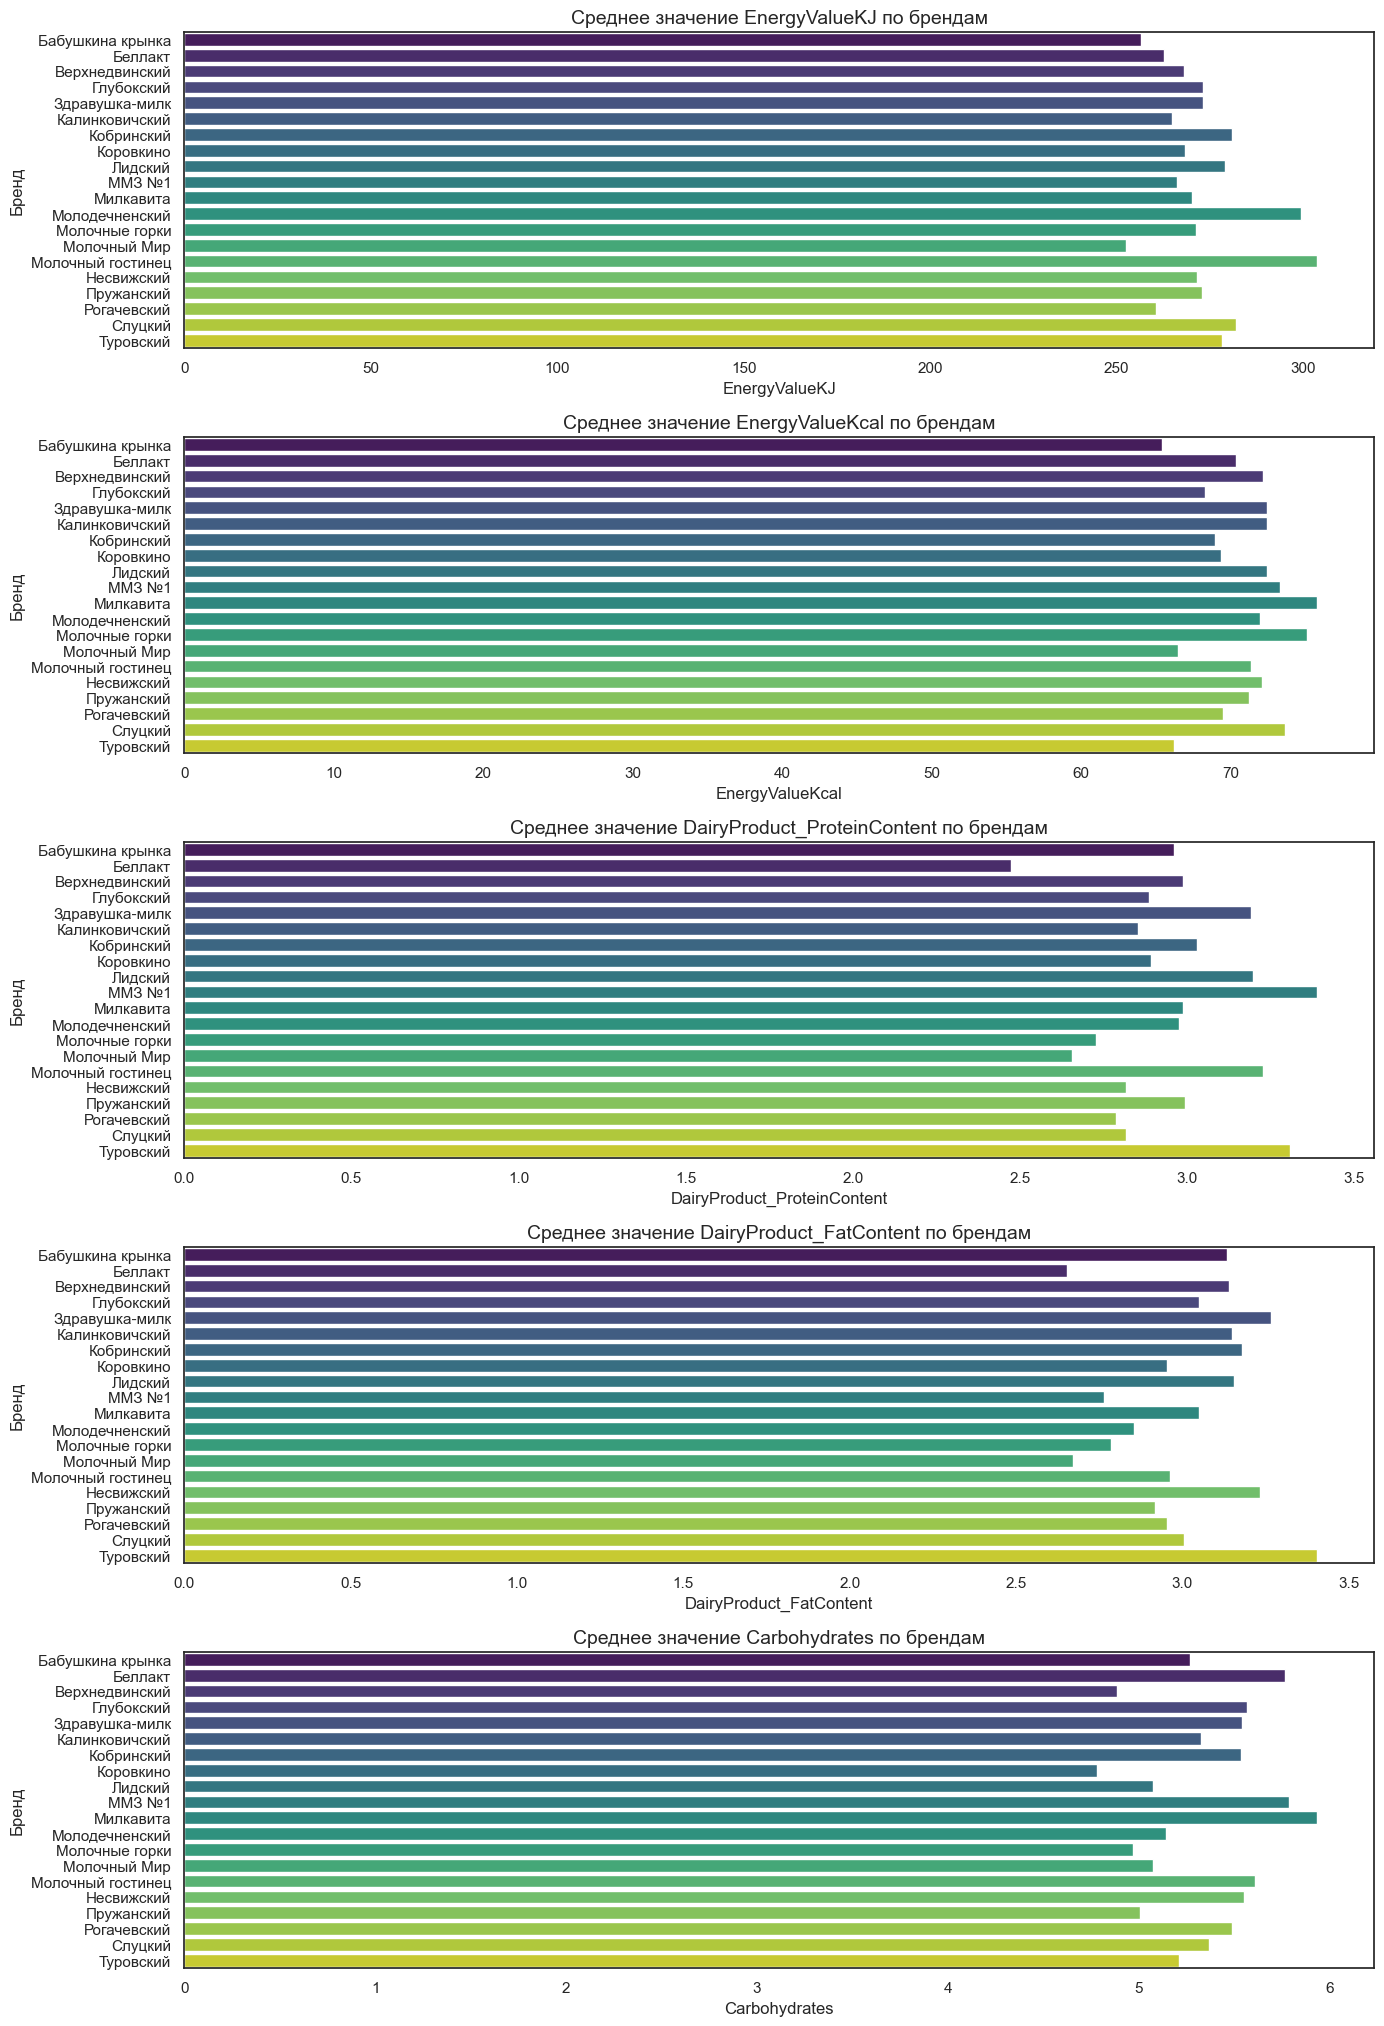

In [15]:
average_nutritional_values = data.groupby('BrandRu')[['EnergyValueKJ', 'EnergyValueKcal', 'DairyProduct_ProteinContent', 'DairyProduct_FatContent', 'Carbohydrates']].mean()

sns.set(style="white")

fig, axes = plt.subplots(6, 1, figsize=(14, 24), facecolor='white')

axes = axes.flatten()

columns = ['EnergyValueKJ', 'EnergyValueKcal', 'DairyProduct_ProteinContent', 'DairyProduct_FatContent', 'Carbohydrates']

palette = sns.color_palette("viridis", len(average_nutritional_values))

for i, column in enumerate(columns):
    sns.barplot(x=average_nutritional_values[column].values, y=average_nutritional_values.index, ax=axes[i], palette=palette)
    axes[i].set_title(f'Среднее значение {column} по брендам', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Бренд', fontsize=12)
    axes[i].grid(False) 
    axes[i].set_facecolor('white')  

fig.delaxes(axes[-1])

plt.tight_layout()


plt.show()

Страны-производители:
 DairyProduct_ManufacturerCountry
112    1000
Name: count, dtype: int64


<Axes: xlabel='DairyProduct_ManufacturerCountry'>

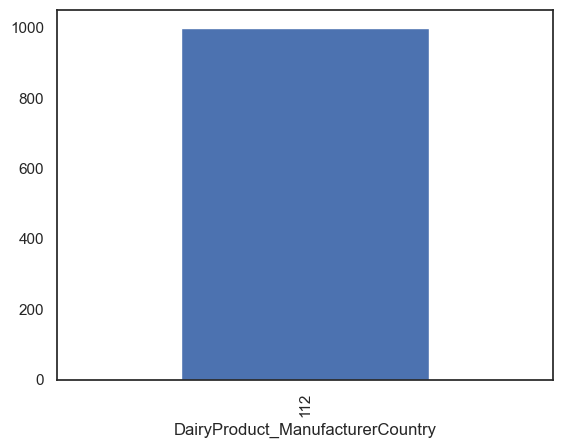

In [17]:
countries = data['DairyProduct_ManufacturerCountry'].value_counts()
print("Страны-производители:\n", countries)
countries.plot(kind='bar')

Средние значения признаков в каждом кластере:
          EnergyValueKJ  EnergyValueKcal  DairyProduct_ProteinContent  \
Cluster                                                                
0           261.143561        85.033317                     2.304829   
1           259.186243        81.650497                     2.693867   
2           302.555419        53.742217                     1.997537   
3           277.985930        78.265126                     3.919698   
4           263.673443        57.582170                     3.889151   

         DairyProduct_FatContent  Carbohydrates  
Cluster                                          
0                       4.014732       4.664780  
1                       1.979227       7.746354  
2                       2.815419       4.826897  
3                       2.344221       3.303568  
4                       3.758632       6.363302  


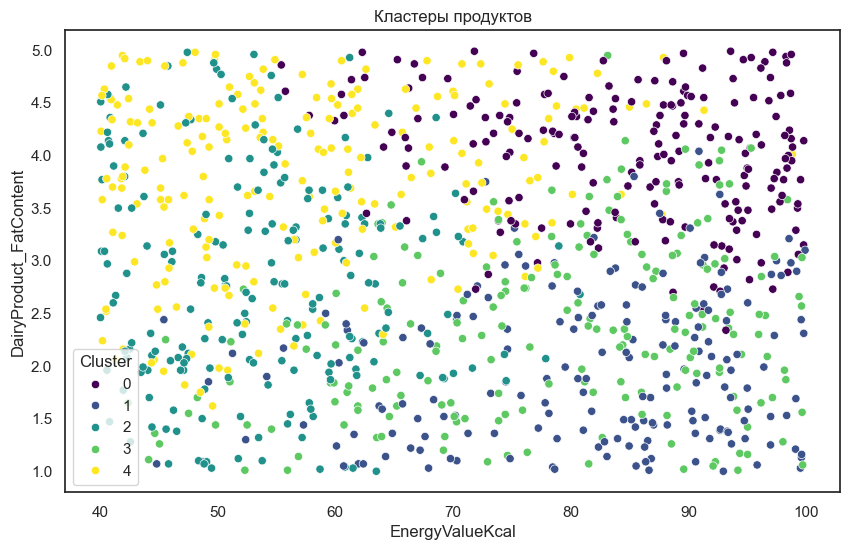

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['EnergyValueKJ', 'EnergyValueKcal', 'DairyProduct_ProteinContent', 'DairyProduct_FatContent', 'Carbohydrates']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = data.groupby('Cluster')[features].mean()
print("Средние значения признаков в каждом кластере:\n", cluster_summary)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='EnergyValueKcal', y='DairyProduct_FatContent', hue='Cluster', palette='viridis')
plt.title("Кластеры продуктов")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = data[features]
y = data['DairyProduct_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Отчет по классификации:\n", classification_report(y_test, y_pred))

Отчет по классификации:
                      precision    recall  f1-score   support

Глазированные сырки       0.24      0.30      0.26        27
             Йогурт       0.08      0.12      0.09        17
              Кефир       0.00      0.00      0.00        16
              Масло       0.10      0.11      0.10        19
             Молоко       0.06      0.05      0.05        21
        Простокваша       0.12      0.11      0.11        19
             Сливки       0.14      0.17      0.15        18
            Сметана       0.10      0.11      0.10        19
                Сыр       0.22      0.24      0.23        17
             Творог       0.11      0.04      0.06        27

           accuracy                           0.12       200
          macro avg       0.12      0.12      0.12       200
       weighted avg       0.12      0.12      0.12       200



Важность признаков:
 EnergyValueKcal                0.209285
Carbohydrates                  0.204190
EnergyValueKJ                  0.199214
DairyProduct_ProteinContent    0.194017
DairyProduct_FatContent        0.193294
dtype: float64


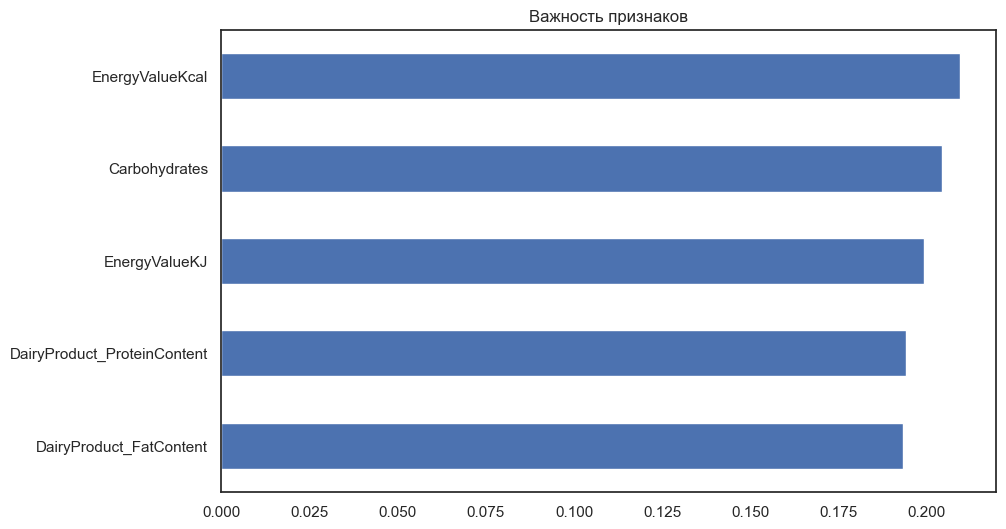

In [20]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

feature_importances = pd.Series(clf.feature_importances_, index=features)
print("Важность признаков:\n", feature_importances.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title("Важность признаков")
plt.show()